In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [3]:
# Carga de datos
df = pd.read_csv('datos_sintetico.csv', sep='|')

print(f"Dataset cargado correctamente. Forma: {df.shape}")
df.head()

Dataset cargado correctamente. Forma: (4133, 31)


,Calif promedio iglesias,Calif promedio resorts,Calif promedio playas,Calif promedio parques,Calif promedio teatros,Calif promedio museos,Calif promedio centros_comerciales,Calif promedio zoologicos,Calif promedio restaurantes,Calif promedio bares_pubs,...,Calif promedio miradores,Calif promedio monumentos,Calif promedio jardines,provincia,canton,parroquia,nombre,lat,lon,score
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.0,0.0,0.0,SANTA ELENA,SANTA ELENA,SANTA ELENA,CATEDRAL DE EMPERATRIZ DE SANTA ELENA,-2.226780,-80.858440,1.569167
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.0,0.0,0.0,SANTA ELENA,SANTA ELENA,SANTA ELENA,MUSEO AMANTES DE SUMPA,-2.234000,-80.867480,1.581667
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.0,0.0,0.0,SANTA ELENA,SANTA ELENA,MANGLARALTO,MUSEO VENUS VALDIVIA,-1.942400,-80.724380,1.580417
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.0,0.0,0.0,COTOPAXI,LATACUNGA,MULALO,HACIENDA SAN AGUSTÍN DEL CALLO,-0.729013,-78.588847,1.590417
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.0,0.0,0.0,CHIMBORAZO,CHAMBO,CHAMBO,AGUAS TERMALES AGUALLANCHI,-1.791117,-78.546000,1.580417


In [4]:
# Información básica
print("=== Información del dataset ===")
print(df.info())

print("\n=== Valores nulos ===")
print(df.isnull().sum())

print("\n=== Estadísticas descriptivas ===")
df.describe()

=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Calif promedio iglesias                   4133 non-null   float64
 1   Calif promedio resorts                    4133 non-null   float64
 2   Calif promedio playas                     4133 non-null   float64
 3   Calif promedio parques                    4133 non-null   float64
 4   Calif promedio teatros                    4133 non-null   float64
 5   Calif promedio museos                     4133 non-null   float64
 6   Calif promedio centros_comerciales        4133 non-null   float64
 7   Calif promedio zoologicos                 4133 non-null   float64
 8   Calif promedio restaurantes               4133 non-null   float64
 9   Calif promedio bares_pubs                 4133 non-null   float64
 10  Cali

,Calif promedio iglesias,Calif promedio resorts,Calif promedio playas,Calif promedio parques,Calif promedio teatros,Calif promedio museos,Calif promedio centros_comerciales,Calif promedio zoologicos,Calif promedio restaurantes,Calif promedio bares_pubs,...,Calif promedio gimnasios,Calif promedio panaderias,Calif promedio belleza_spas,Calif promedio cafeterias,Calif promedio miradores,Calif promedio monumentos,Calif promedio jardines,lat,lon,score
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,...,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,1133.000000,1133.000000,4133.000000
mean,1.395689,2.234021,2.569249,2.713876,2.901052,3.041749,3.429923,2.806619,3.427488,3.142632,...,0.768736,0.955669,0.940502,0.915346,1.813877,1.422605,1.446732,-2.010958,-79.213070,2.062798
std,0.684446,1.094822,1.043896,0.972457,0.964491,0.985158,1.008997,0.895126,1.019033,0.997518,...,0.689344,0.898479,0.828599,0.677050,1.278929,0.962194,0.867575,1.470587,1.509917,0.195631
min,0.000000,0.000000,0.000000,0.000000,0.313632,0.037227,0.282089,0.000000,0.233438,0.054858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.730180,-91.135020,1.235000
25%,0.969101,1.441032,1.801666,1.980748,2.200000,2.307367,2.750780,2.150000,2.720000,2.480583,...,0.327930,0.384445,0.449606,0.523664,0.843514,0.790000,0.900000,-3.367994,-79.900010,1.938939
50%,1.359419,2.150333,2.478672,2.639094,2.853069,2.960976,3.377220,2.808252,3.401919,3.077526,...,0.708557,0.781759,0.784804,0.830000,1.570384,1.279540,1.350000,-2.127590,-79.238140,2.063852
75%,1.753495,2.832773,3.171175,3.295656,3.511434,3.698581,4.194031,3.349471,4.206191,3.808235,...,1.050661,1.332201,1.315447,1.209918,2.536060,1.870030,1.870000,-0.848939,-78.447050,2.187959
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.285000,-75.237400,2.862500


=== Distribución de destinos ===
nombre
FIESTAS DE CARNAVAL                            2
IGLESIA MATRIZ                                 2
IGLESIA SAN FRANCISCO                          2
IGLESIA SAN ANTONIO DE PADUA                   2
CASCADA LAS GEMELAS                            2
                                              ..
QUINTA COLINA DEL SOL                          1
QUINTA EL ROCIO                                1
EXHIBICIÓN DE CABALLOS DE PASO - VILCABAMBA    1
ESCARAMUZAS DE CHUQUIRIBAMBA                   1
MERCADO SAN SEBASTIÁN                          1
Name: count, Length: 1124, dtype: int64


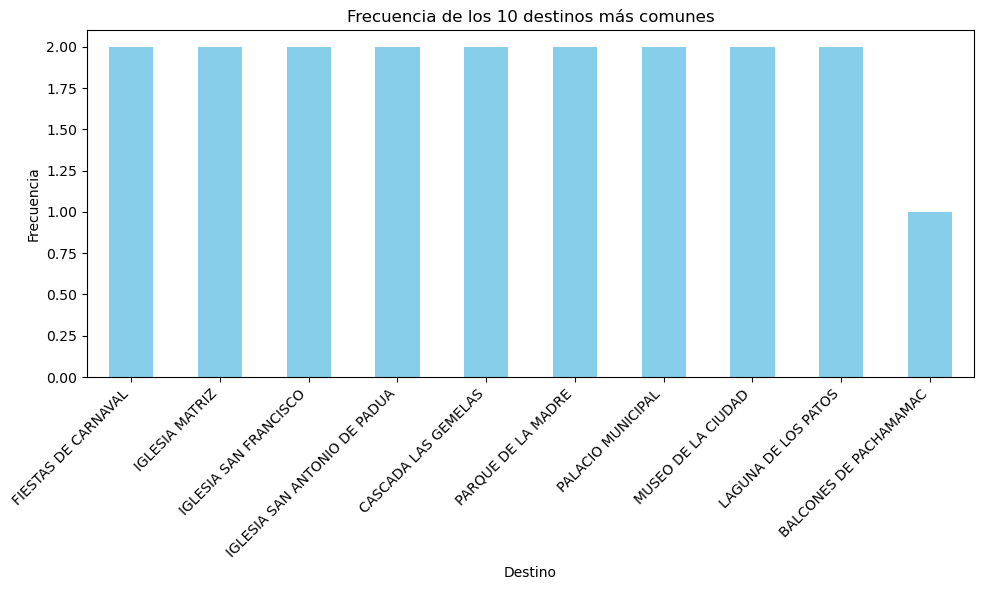

In [6]:
print("=== Distribución de destinos ===")
print(df['nombre'].value_counts())

# Obtenemos unicamente el top 10 para ejemplificación
top_10_destinos = df['nombre'].value_counts().head(10)

# Gráfico del top 10
plt.figure(figsize=(10, 6))
top_10_destinos.plot(kind='bar', color='skyblue')
plt.title("Frecuencia de los 10 destinos más comunes")
plt.xlabel("Destino")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

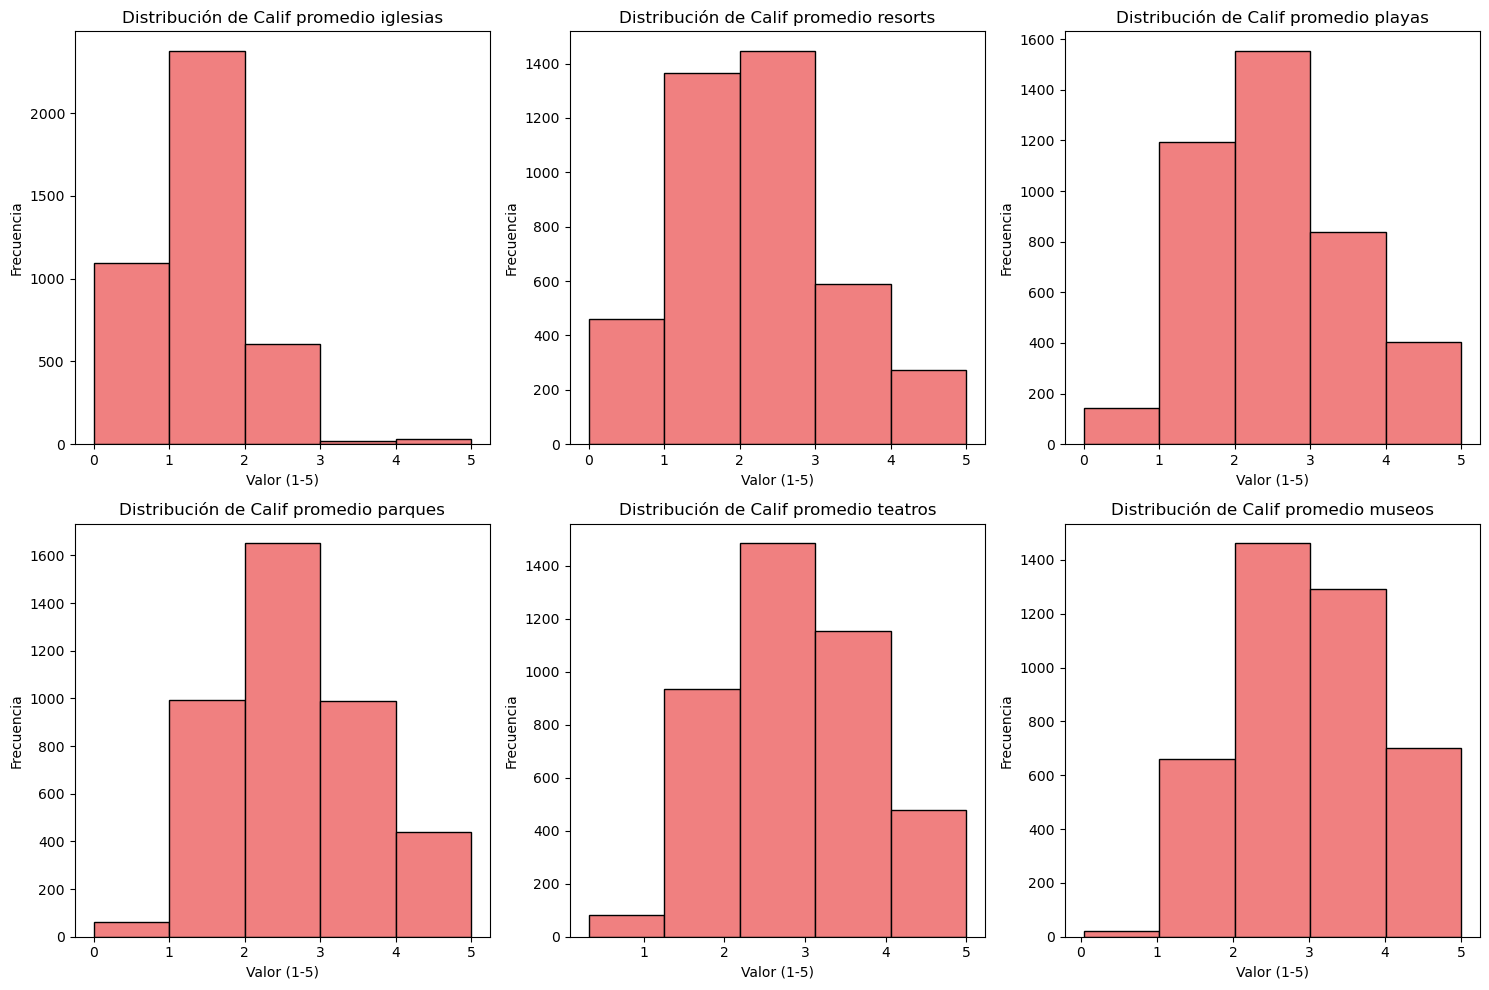

In [8]:
# Seleccionar columnas de preferencias
pref_cols = [col for col in df.columns if col.startswith('Calif')]

# Mostrar distribución de algunas preferencias
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(pref_cols[:6]):  # Mostrar solo 6 para no saturar
    axes[i].hist(df[col], bins=5, color='lightcoral', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('Valor (1-5)')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

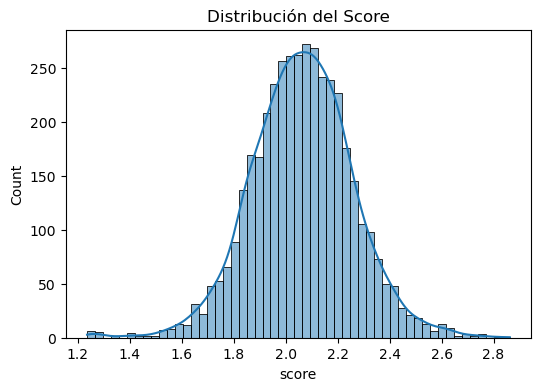

In [9]:
# Distribución de la variable objetivo -> score (target)
plt.figure(figsize=(6,4))
sns.histplot(df["score"], kde=True)
plt.title("Distribución del Score")
plt.show()

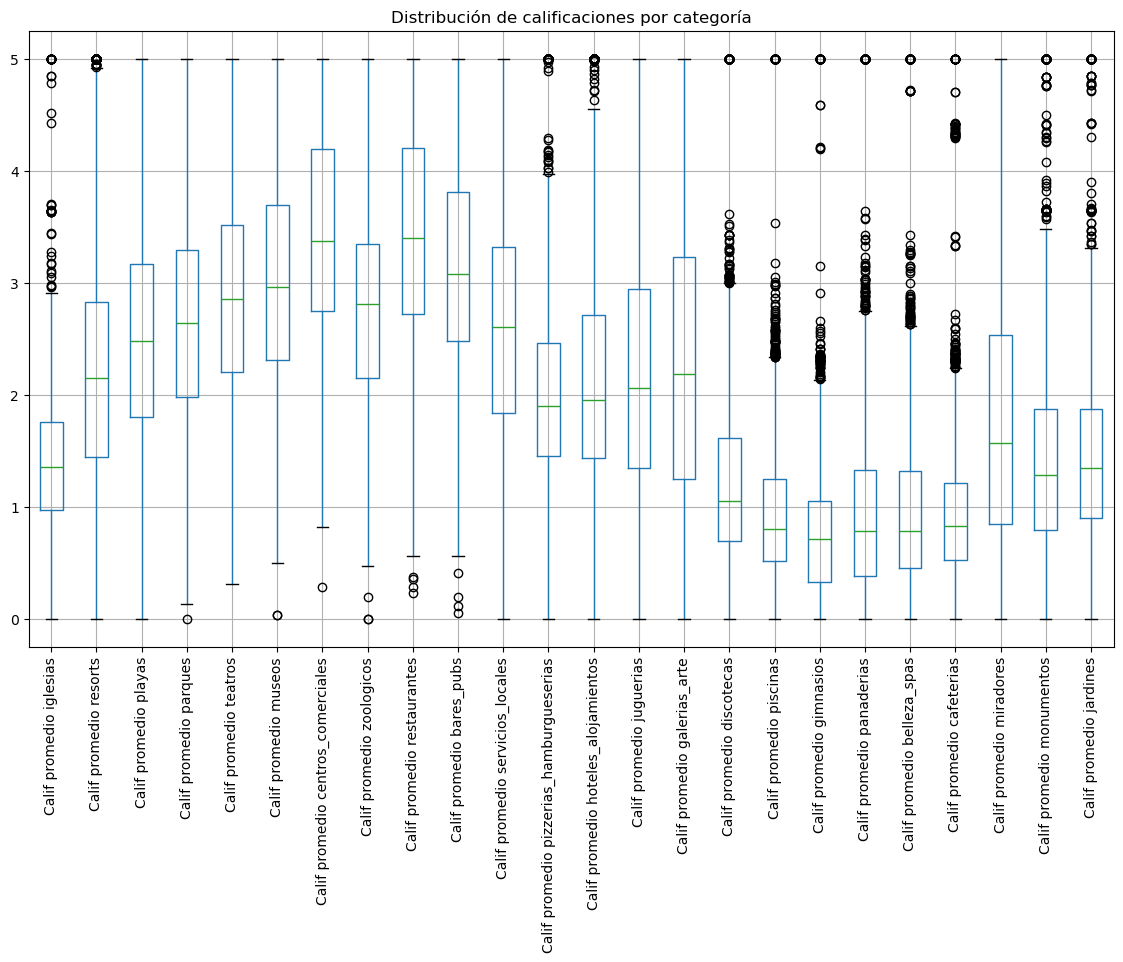

In [11]:
# Distribución de calificaciones por categoria -> permite ver valores atipicos
rating_cols = [col for col in df.columns if "Calif promedio" in col]

plt.figure(figsize=(14,8))
df[rating_cols].boxplot(rot=90)
plt.title("Distribución de calificaciones por categoría")
plt.show()

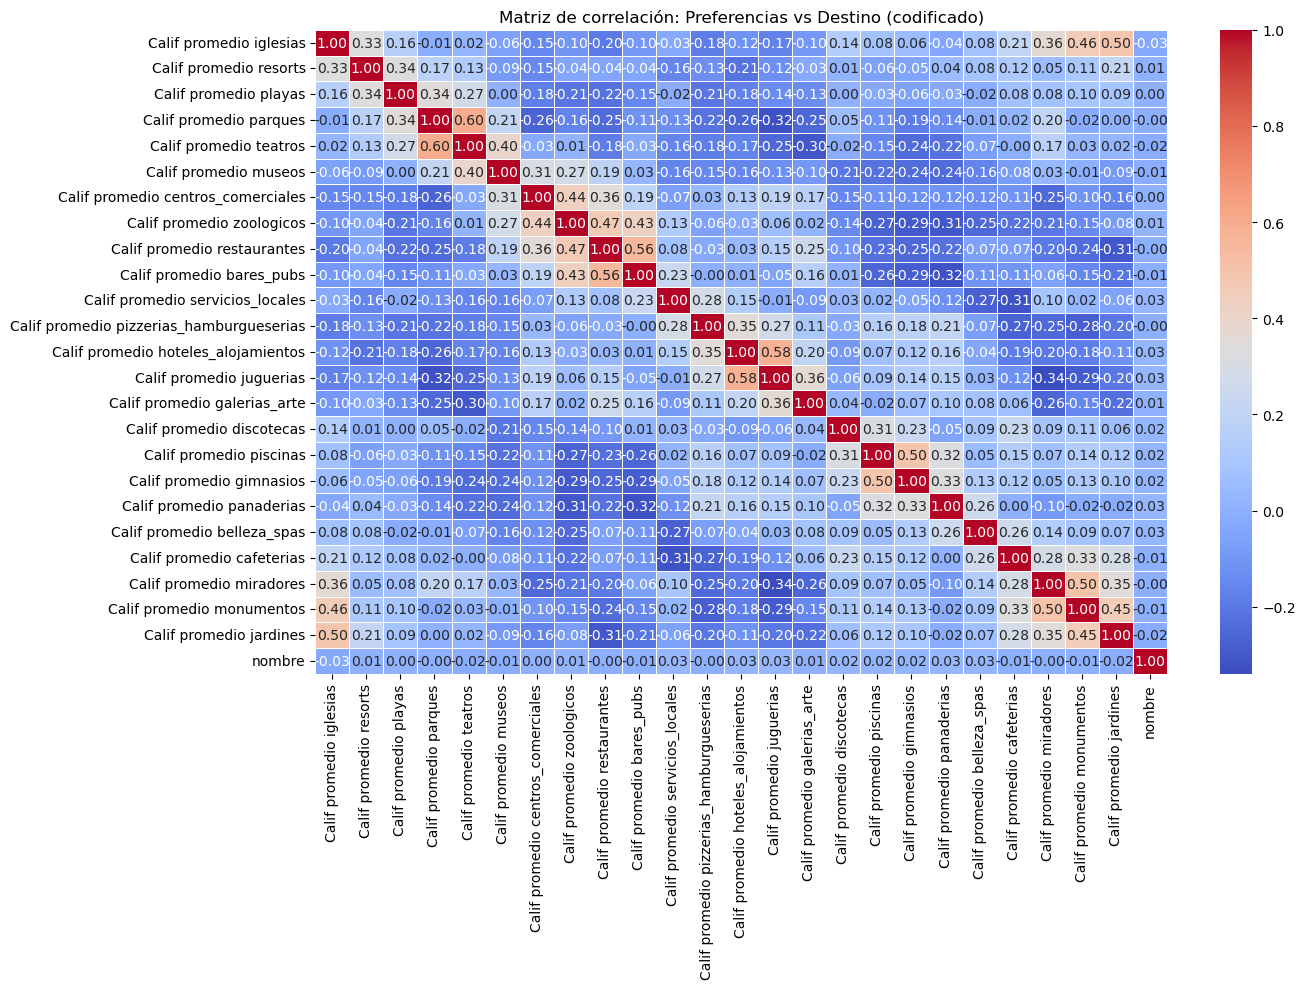

In [12]:
# Codificar las variables categóricas para análisis numérico
categorical_cols = ["provincia", "canton", "parroquia", "nombre"]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Calcular correlación
correlation_data = df[pref_cols + ['nombre']].corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación: Preferencias vs Destino (codificado)")
plt.tight_layout()
plt.show()

In [13]:
# Definir características y objetivo
X = df.drop(columns=["score"])
y = df["score"]

print(f"Características: {X.shape}")
print(f"Etiquetas: {y.shape}")

Características: (4133, 30)
Etiquetas: (4133,)


In [14]:
# Separamos variables de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nEntrenamiento: {X_train.shape[0]} ejemplos")
print(f"Prueba: {X_test.shape[0]} ejemplos")


Entrenamiento: 3306 ejemplos
Prueba: 827 ejemplos


In [15]:
# Entrenar modelo -> predecir una target en base a sus features
modelXG = xgb.XGBRegressor(
    # num arboles de decisión -> cada árbol intenta corregir los errores del anterior
    n_estimators=300,  # valor tipico: entre 50 y 500
    # indica que tanto aporta cada árbol al modelo final
    # Valor pequeño -> aprendizaje más lento pero más preciso
    # Valor grande -> aprende rápido pero puede sobreajustar
    learning_rate=0.05, # valores entre 0.01 y 0.1
    # Niveles de ramificación -> nodos de profundidad
    # mas profundidad -> modelo mas complejo -> riesgo de sobreajuste
    # menos profundidad -> modelo mas simple -> riesgo de subajuste
    max_depth=6, # valor tipico: entre 3 y 10
    # registros que se usan para entrenar cada arbol
    subsample=0.8, # por defecto tiene valor 1.0 -> usar todos los datos
    # Columnas usadas para entrenar cada arbol
    colsample_bytree=0.8, # valor tipico: entre 0.7 y 0.9
    # penalización l1 -> pesos mas simples y reduce overfitting
    reg_alpha=0.1
)

print("Entrenando el modelo...")
modelXG.fit(X_train, y_train)
print("Modelo entrenado correctamente.")

Entrenando el modelo...
Modelo entrenado correctamente.


In [16]:
# Predecir con xg boost
y_pred = modelXG.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.06007838388796282
R2 Score: 0.9126874380316496


In [ ]:
'''
Root Mean Squared Error (RMSE) mide que tanto se equivoca el modelo en promedio
En nuestro caso, el modelo se equivoca ±0.06 puntos respecto al valor real.
Como nuestro score está en una escala de 1 a 5, un error de 0.06 es extremadamente pequeño.
Esto indica que el modelo está prediciendo con alta precisión.

El R^2 mide qué porcentaje de la variabilidad del score es explicado por el modelo.
El modelo captura muy bien las relaciones entre preferencias → destino óptimo.
Muy poca información relevante se está perdiendo.
'''